# **Mercedes-Benz Fabricación más Ecológica**

## Descripción

#### Desde el primer automóvil, el Benz Patent Motor Car en 1886, Mercedes-Benz ha sido sinónimo de importantes innovaciones automotrices. Estas incluyen, por ejemplo, la célula de seguridad para pasajeros con zona de deformación, el airbag y los sistemas inteligentes de asistencia. Mercedes-Benz solicita cerca de 2000 patentes al año, lo que convierte a la marca en líder europeo entre los fabricantes de automóviles premium. Los autos de Mercedes-Benz, pertenecientes a Daimler, son líderes en la industria de vehículos de alta gama. Con una amplia selección de características y opciones, los clientes pueden elegir el Mercedes-Benz personalizado de sus sueños.

#### Para garantizar la seguridad y fiabilidad de cada configuración única de automóvil antes de que salgan a la carretera, los ingenieros de Daimler han desarrollado un sistema de pruebas robusto. Sin embargo, optimizar la velocidad de su sistema de pruebas para tantas combinaciones posibles de características es complejo y requiere mucho tiempo sin un enfoque algorítmico poderoso. Como uno de los mayores fabricantes de automóviles premium del mundo, la seguridad y la eficiencia son fundamentales en las líneas de producción de Daimler.

![](../images/daimler-mercedes%20V02.jpg)


#### En esta competencia, Daimler reta a los participantes de Kaggle a abordar la maldición de la dimensionalidad y reducir el tiempo que los autos pasan en el banco de pruebas. Los competidores trabajarán con un conjunto de datos que representa diferentes permutaciones de características de los automóviles Mercedes-Benz para predecir el tiempo que toma aprobar las pruebas. Los algoritmos ganadores contribuirán a agilizar las pruebas, lo que resultará en menores emisiones de dióxido de carbono sin reducir los estándares de Daimler.


---

## **Evaluación**


### Las entregas se evaluarán según el valor R^2, también llamado coeficiente de determinación.

---

## Descripción del Conjunto de Datos

#### El conjunto de datos contiene un conjunto anonimizado de variables, cada una representando una característica personalizada en un automóvil Mercedes. Por ejemplo, una variable podría ser tracción en las cuatro ruedas (4WD), suspensión neumática adicional o una pantalla de visualización frontal (head-up display).

#### La variable de referencia está etiquetada como 'y' y representa el tiempo (en segundos) que el automóvil tardó en pasar las pruebas para cada configuración de características.

---

# 01_EDA — Análisis exploratorio de datos

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [18]:
warnings.filterwarnings("ignore")

In [2]:
# Cargar datos
train = pd.read_csv('../data/raw/train.csv')
test = pd.read_csv('../data/raw/test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [4]:
train.shape

(4209, 378)

In [5]:
train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Vista general
print(train.head())
print(train.info())
print(train.describe())

   ID       y  X0 X1  X2 X3 X4 X5 X6 X8  ...  X375  X376  X377  X378  X379  \
0   0  130.81   k  v  at  a  d  u  j  o  ...     0     0     1     0     0   
1   6   88.53   k  t  av  e  d  y  l  o  ...     1     0     0     0     0   
2   7   76.26  az  w   n  c  d  x  j  x  ...     0     0     0     0     0   
3   9   80.62  az  t   n  f  d  x  l  e  ...     0     0     0     0     0   
4  13   78.02  az  v   n  f  d  h  d  n  ...     0     0     0     0     0   

   X380  X382  X383  X384  X385  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     1     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 378 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB
None
                ID            y          X10     X11          X12  \
count  4209.000000  4209.000000  4209.000000  4209.0  420

In [7]:
# Get column names
column_names = train.columns
print(column_names)

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)


———
### Detección de variables categóricas

In [8]:
# Ver variables categóricas
categorical_cols = [col for col in train.columns if col.startswith('X') and train[col].dtype == 'object']
print("Variables categóricas: ", categorical_cols)

Variables categóricas:  ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


In [9]:
def categorias_info(df, cat_columns):
    """
    Muestra el número de categorías y las categorías únicas para cada variable categórica.
    Genera una tabla resumen, un gráfico de barras y un conteo detallado de cada categoría.

    Parámetros:
        df (DataFrame): El DataFrame de entrada.
        cat_columns (list): Lista de columnas categóricas.
        
    Retorna:
        resumen (DataFrame): Número de categorías y categorías únicas por variable.
        conteo_categorias (DataFrame): Conteo detallado de cada categoría en cada variable.
    """
    # Crear un DataFrame con el conteo de categorías
    resumen = pd.DataFrame({
        'Número de Categorías': [df[col].nunique() for col in cat_columns],
        'Categorías': [df[col].unique() for col in cat_columns]
    }, index=cat_columns)
    
    # Graficar el número de categorías por columna
    plt.figure(figsize=(10, 6))
    sns.barplot(x=resumen.index, y=resumen['Número de Categorías'], palette="viridis")
    plt.title('Número de categorías por variable categórica')
    plt.ylabel('Número de categorías')
    plt.xlabel('Variables categóricas')
    plt.xticks(rotation=45)
    plt.show()
    
    # Generar el conteo de cada categoría para cada variable categórica
    conteo_categorias = pd.concat([df[col].value_counts().rename(col) for col in cat_columns], axis=1)
    conteo_categorias = conteo_categorias.fillna("-")  # Reemplazar NaN con "-"
    
    # Mostrar la tabla resumen
    print("Resumen de variables categóricas:")
    display(resumen)
    
    # Mostrar el conteo detallado
    print("\nConteo de cada categoría en cada variable categórica:")
    display(conteo_categorias)


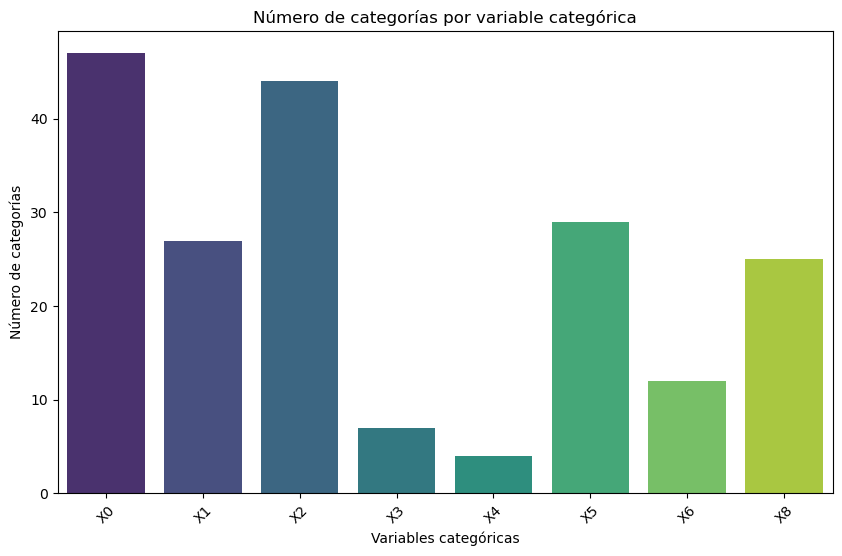

Resumen de variables categóricas:


,Número de Categorías,Categorías
X0,47,"[k, az, t, al, o, w, j, h, s, n, ay, f, x, y, ..."
X1,27,"[v, t, w, b, r, l, s, aa, c, a, e, h, z, j, o,..."
X2,44,"[at, av, n, e, as, aq, r, ai, ak, m, a, k, ae,..."
X3,7,"[a, e, c, f, d, b, g]"
X4,4,"[d, b, c, a]"
X5,29,"[u, y, x, h, g, f, j, i, d, c, af, ag, ab, ac,..."
X6,12,"[j, l, d, h, i, a, g, c, k, e, f, b]"
X8,25,"[o, x, e, n, s, a, h, p, m, k, d, i, v, j, b, ..."



Conteo de cada categoría en cada variable categórica:


,X0,X1,X2,X3,X4,X5,X6,X8
z,360.0,46.0,19.0,-,-,-,-,-
ak,349.0,-,265.0,-,-,-,-,-
y,324.0,23.0,11.0,-,-,1.0,-,116.0
ay,313.0,-,54.0,-,-,-,-,-
t,306.0,31.0,29.0,-,-,-,-,119.0
x,300.0,-,10.0,-,-,2.0,-,105.0
o,269.0,82.0,1.0,-,-,20.0,-,163.0
f,227.0,23.0,87.0,1076.0,-,7.0,20.0,243.0
n,195.0,19.0,137.0,-,-,212.0,-,242.0
w,182.0,52.0,-,-,-,231.0,-,196.0


In [10]:
# Lista de variables categóricas
categorical_cols = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

# Llamada a la función
categorias_info(train, categorical_cols)


———
### Conteo de variables binarias

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

def analizar_variables_binarias(df):
    """
    Identifica las variables binarias (0 y 1) y calcula el porcentaje de 0 y 1 en cada una.
    Muestra una tabla resumen y un gráfico de barras con los porcentajes.

    Parámetros:
        df (DataFrame): El DataFrame de entrada.

    Retorna:
        resumen_binarias (DataFrame): DataFrame con los porcentajes de 0 y 1.
    """
    # Identificar variables binarias (solo valores 0 y 1)
    binarias = [col for col in df.columns if df[col].dropna().isin([0, 1]).all()]

    # Crear un DataFrame con los porcentajes de 0 y 1
    resumen_binarias = pd.DataFrame({
        'Porcentaje de 0': [100 * (df[col] == 0).mean() for col in binarias],
        'Porcentaje de 1': [100 * (df[col] == 1).mean() for col in binarias]
    }, index=binarias)
    
    # Mostrar la tabla resumen
    print("Resumen de variables binarias:")
    display(resumen_binarias)

    # Graficar los porcentajes de 1 y 0 para cada variable
    resumen_binarias.plot(kind='bar', stacked=True, figsize=(34, 6), color=["skyblue", "orange"])
    plt.title('Distribución de 0 y 1 en Variables Binarias')
    plt.ylabel('Porcentaje (%)')
    plt.xlabel('Variables Binarias')
    plt.legend(title="Valor", labels=["0", "1"])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    return resumen_binarias

Resumen de variables binarias:


,Porcentaje de 0,Porcentaje de 1
X10,98.669518,1.330482
X11,100.000000,0.000000
X12,92.492278,7.507722
X13,94.202899,5.797101
X14,57.186980,42.813020
...,...,...
X380,99.192207,0.807793
X382,99.239724,0.760276
X383,99.833690,0.166310
X384,99.952483,0.047517


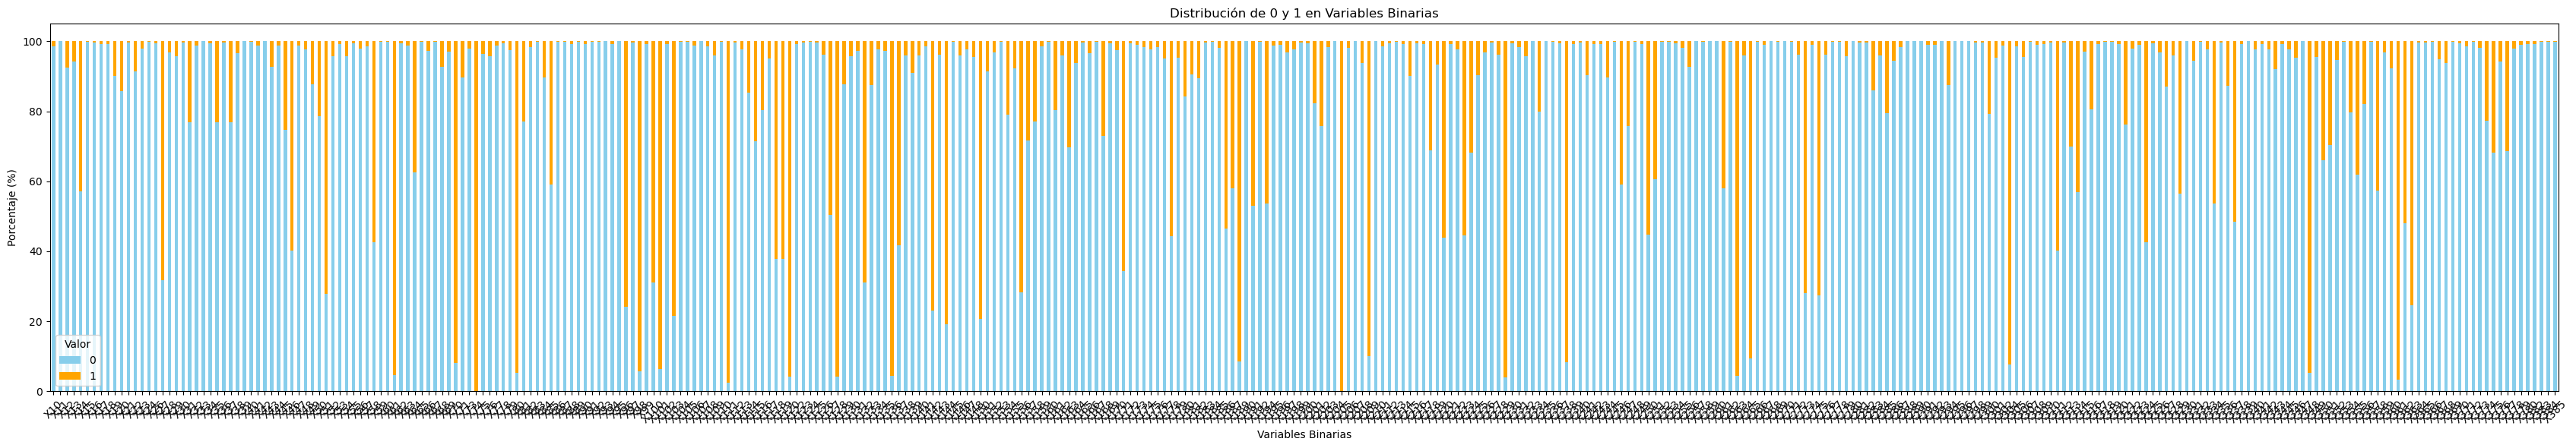

In [12]:
# Llamar a la función usando tu dataset (ejemplo con train_encoded)
resumen_binarias = analizar_variables_binarias(train)

———
### Correlaciones respecto a Y (solo variables numéricas)

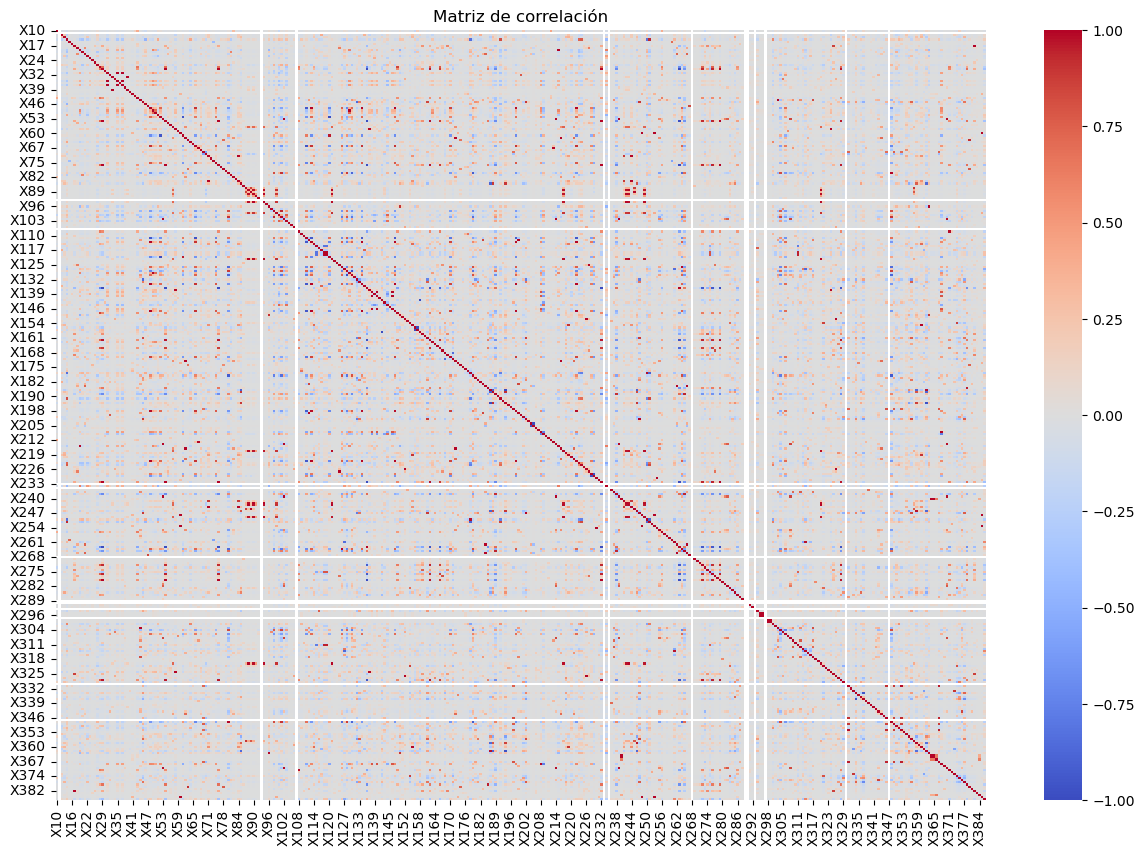

In [13]:
# Ver correlaciones con y (solo numéricas)
numeric_cols = [col for col in train.columns if train[col].dtype != 'object' and col not in ['y','ID']]
corr = train[numeric_cols + ['y']].corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Matriz de correlación')
plt.show()


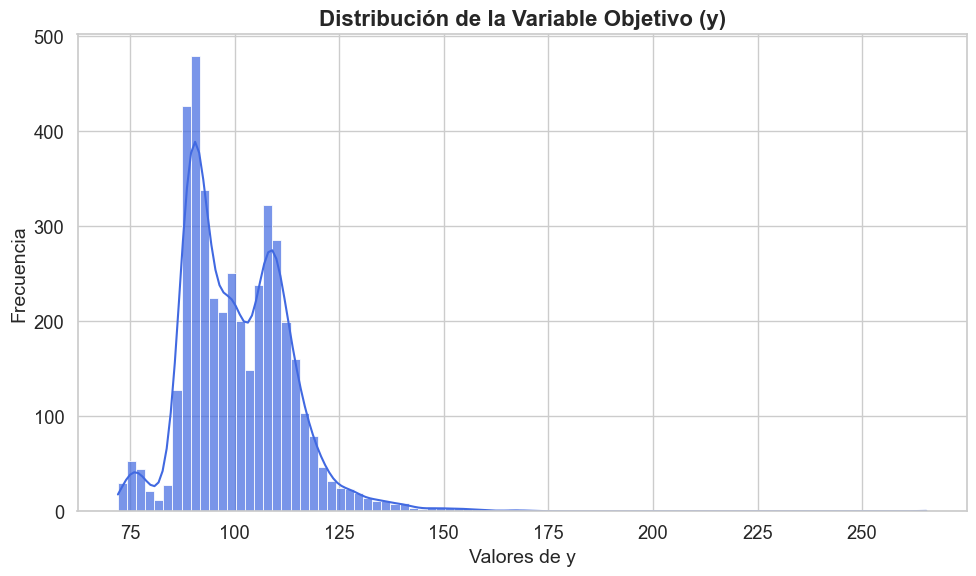

In [8]:
# Configuración del estilo
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Crear la figura
plt.figure(figsize=(10, 6))  # Ajustar tamaño de la gráfica

# Histograma con KDE
sns.histplot(train['y'], kde=True, color="royalblue", bins=89, alpha=0.7)

# Mejorar título y etiquetas
plt.title('Distribución de la Variable Objetivo (y)', fontsize=16, fontweight='bold')
plt.xlabel('Valores de y', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Ajustar el diseño
plt.tight_layout()

# Mostrar la gráfica
plt.show()

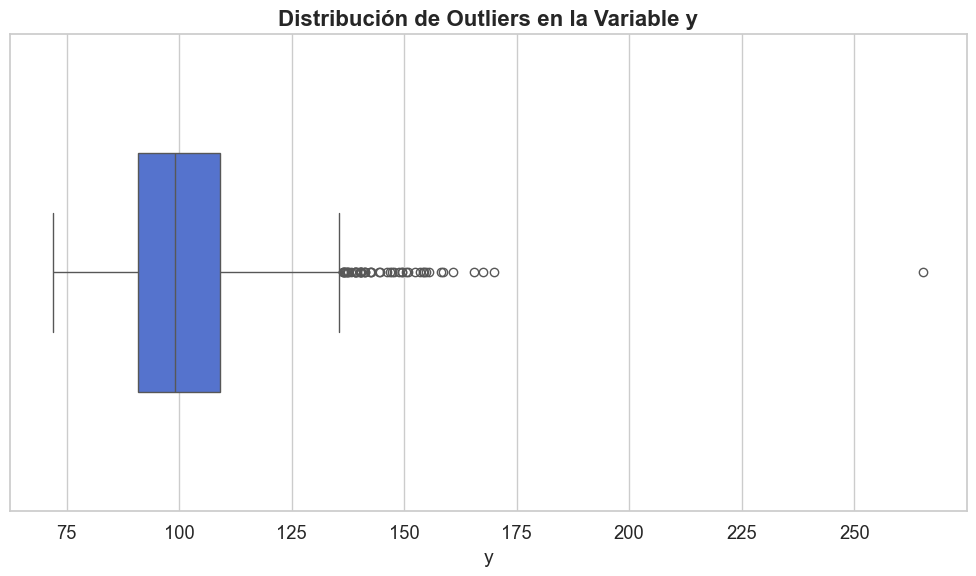

In [9]:
# Configuración del estilo y tamaño
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
plt.figure(figsize=(10, 6))  # Ajustamos el tamaño de la figura

# Boxplot con personalización
sns.boxplot(x=train['y'], color="royalblue", width=0.5)

# Mejoramos título y etiquetas
plt.title('Distribución de Outliers en la Variable y', fontsize=16, fontweight='bold')
plt.xlabel('y', fontsize=14)
plt.tight_layout()  # Evita que se recorten elementos

# Mostrar la gráfica
plt.show()

---

# **02_Feature_Engineering**

In [16]:
import pandas as pd

# Cargar datos
train = pd.read_csv('../data/raw/train.csv')
test = pd.read_csv('../data/raw/test.csv')

# Separar la variable objetivo
y_train = train['y']
train.drop(['y'], axis=1, inplace=True)

# Identificar columnas categóricas
cat_cols = [col for col in train.columns if train[col].dtype == 'object']

# Aplicar One-Hot Encoding
train_encoded = pd.get_dummies(train, columns=cat_cols, drop_first=True)
test_encoded = pd.get_dummies(test, columns=cat_cols, drop_first=True)

# Alinear columnas entre train y test (importante para evitar problemas de tamaño)
train_encoded, test_encoded = train_encoded.align(test_encoded, join='left', axis=1, fill_value=0)

# Restaurar la variable objetivo en train
train_encoded['y'] = y_train

# Guardar los datos preprocesados
train_encoded.to_csv('../data/processed/train_processed.csv', index=False)
test_encoded.to_csv('../data/processed/test_processed.csv', index=False)


In [26]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Cargar datos
train = pd.read_csv('../data/raw/train.csv')
test = pd.read_csv('../data/raw/test.csv')

# # Definir umbral superior usando el rango intercuartil (IQR)
# Q1 = train['y'].quantile(0.25)
# Q3 = train['y'].quantile(0.75)
# IQR = Q3 - Q1

# # Definir límites
# limite_inferior = Q1 - 1.5 * IQR
# limite_superior = Q3 + 1.5 * IQR

# # Filtrar los datos dentro de los límites
# train = train[(train['y'] >= limite_inferior) & (train['y'] <= limite_superior)]

# Separar la variable objetivo
y_train = train['y']
train.drop(['y'], axis=1, inplace=True)

# Identificar columnas categóricas
cat_cols = [col for col in train.columns if train[col].dtype == 'object']

# Aplicar One-Hot Encoding
train_encoded = pd.get_dummies(train, columns=cat_cols, drop_first=True)
test_encoded = pd.get_dummies(test, columns=cat_cols, drop_first=True)

# Alinear columnas entre train y test
train_encoded, test_encoded = train_encoded.align(test_encoded, join='left', axis=1, fill_value=0)

# Restaurar la variable objetivo en train
train_encoded['y'] = y_train

# =====================
# Selección de características
# =====================
X = train_encoded.drop(['y'], axis=1)
y = train_encoded['y']

# Entrenamos un modelo para obtener la importancia de variables
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Seleccionar las top N características más importantes
top_n = 50  # Ajustar según necesidad
top_features = feature_importances['feature'].head(top_n).tolist()

# Reducir conjuntos de datos a las top N características
train_reduced = train_encoded[top_features + ['y']]
test_reduced = test_encoded[top_features]

# Guardar los datos preprocesados con selección de variables
train_reduced.to_csv('../data/processed/train_processed.csv', index=False)
test_reduced.to_csv('../data/processed/test_processed.csv', index=False)

In [27]:
# print(f"Datos originales: {len(train)}")
# print(f"Datos después de eliminar outliers: {len(train_clean)}")

Datos originales: 4159
Datos después de eliminar outliers: 4159


In [25]:
import numpy as np

# Definir umbral superior usando el rango intercuartil (IQR)
Q1 = train['y'].quantile(0.25)
Q3 = train['y'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los datos dentro de los límites
train_clean = train[(train['y'] >= limite_inferior) & (train['y'] <= limite_superior)]

print(f"Datos originales: {len(train)}")
print(f"Datos después de eliminar outliers: {len(train_clean)}")


Datos originales: 4209
Datos después de eliminar outliers: 4159


In [11]:
train_reduced.shape

(4209, 51)

In [19]:
feature_importances

,feature,importance
298,X314,0.367530
0,ID,0.076881
299,X315,0.069344
108,X119,0.027477
107,X118,0.026551
...,...,...
274,X289,0.000000
475,X2_o,0.000000
195,X210,0.000000
189,X204,0.000000


Resumen de variables binarias:


,Porcentaje de 0,Porcentaje de 1
X314,56.830601,43.169399
X315,97.125208,2.874792
X119,37.776194,62.223806
X118,37.776194,62.223806
X5_ag,95.153243,4.846757
X263,4.300309,95.699691
X29,95.699691,4.300309
X136,4.347826,95.652174
X127,50.487052,49.512948
X189,8.458066,91.541934


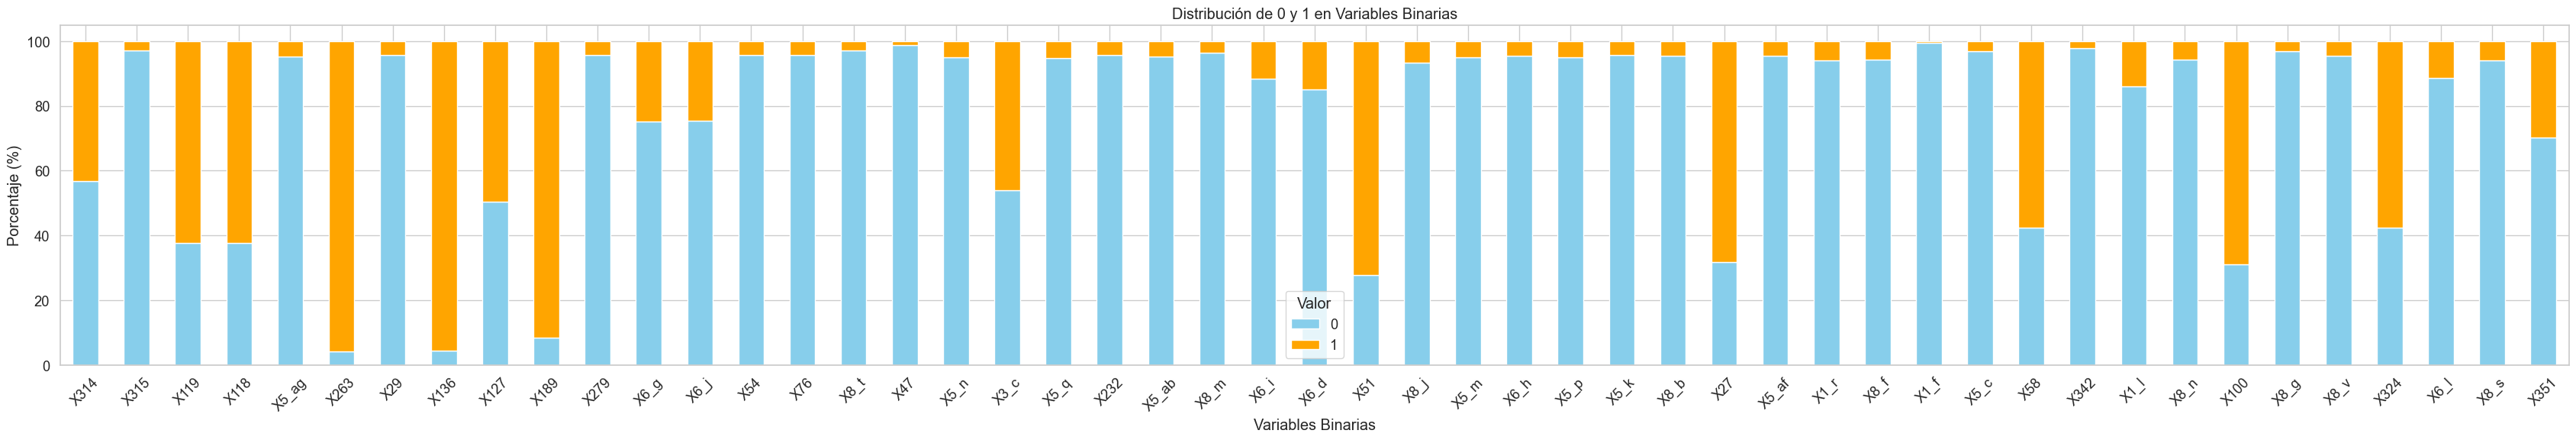

In [14]:
# Llamar a la función usando tu dataset (ejemplo con train_encoded)
resumen_binarias = analizar_variables_binarias(train_reduced)

In [28]:
# Lista de variables finales seleccionadas manualmente
final_variables = ["ID", "X314", "X119", "X118", "X127", "X6_g", "X6_j", "X3_c", 
                   "X51", "X27", "X58", "X100", "X324", "X351"]

# Crear datasets reducidos con las variables finales
train_final = train_encoded[final_variables + ['y']]  # Incluir la variable objetivo
test_final = test_encoded[final_variables]           # No tiene 'y'

# Guardar los nuevos datasets preprocesados
train_final.to_csv('../data/processed/train_final.csv', index=False)
test_final.to_csv('../data/processed/test_final.csv', index=False)

# Confirmar la creación
print("Nuevo dataset de train guardado en '../data/processed/train_final.csv'")
print("Nuevo dataset de test guardado en '../data/processed/test_final.csv'")

Nuevo dataset de train guardado en '../data/processed/train_final.csv'
Nuevo dataset de test guardado en '../data/processed/test_final.csv'


In [23]:
train_final.shape

(4209, 15)

In [24]:
train_final.head()

,ID,X314,X119,X118,X127,X6_g,X6_j,X3_c,X51,X27,X58,X100,X324,X351,y
0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,130.81
1,6,0,1,1,1,0,0,0,1,1,0,1,0,0,88.53
2,7,0,0,0,0,0,1,1,1,1,1,0,1,0,76.26
3,9,0,0,0,0,0,0,0,0,1,0,0,0,0,80.62
4,13,0,0,0,0,0,0,0,1,1,0,0,0,0,78.02


In [25]:
train_final["y"].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

# **03_Model_Training**

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import xgboost as xgb

# Cargar datasets procesados
train = pd.read_csv('../data/processed/train_processed.csv')
test = pd.read_csv('../data/processed/test_processed.csv')

X = train.drop(['ID','y'], axis=1)
y = train['y']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo simple: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_val = lr.predict(X_val)
print("R2 - Linear Regression:", r2_score(y_val, y_pred_val))

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_val = rf.predict(X_val)
print("R2 - Random Forest:", r2_score(y_val, y_pred_val))

# XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_val = xgb_model.predict(X_val)
print("R2 - XGBoost:", r2_score(y_val, y_pred_val))


R2 - Linear Regression: 0.6088099657533547
R2 - Random Forest: 0.5474930016320785
R2 - XGBoost: 0.5517833060091166


In [ ]:
import sklearn
import xgboost

print("scikit-learn version:", sklearn.__version__)
print("XGBoost version:", xgboost.__version__)

### Old
R2 - Linear Regression: -5.861638430258711e+17

R2 - Random Forest: 0.47677223184652995

R2 - XGBoost: 0.4493248093845822

### New old

R2 - Linear Regression: -2.5515201504809637e+22

R2 - Random Forest: 0.45368204523098465

R2 - XGBoost: 0.47614738908422194

### New New

R2 - Linear Regression: 0.5712790312497402

R2 - Random Forest: 0.4601147174332342

R2 - XGBoost: 0.3819934872812919

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import xgboost as xgb

# Cargar datasets procesados
train = pd.read_csv('../data/processed/train_final.csv')
test = pd.read_csv('../data/processed/test_final.csv')

X = train.drop(['ID','y'], axis=1)
y = train['y']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo simple: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_val = lr.predict(X_val)
print("R2 - Linear Regression:", r2_score(y_val, y_pred_val))

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_val = rf.predict(X_val)
print("R2 - Random Forest:", r2_score(y_val, y_pred_val))

# XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_val = xgb_model.predict(X_val)
print("R2 - XGBoost:", r2_score(y_val, y_pred_val))


R2 - Linear Regression: 0.465543514289263
R2 - Random Forest: 0.45314863056211396
R2 - XGBoost: 0.41901054777115887


### New New (4209, 14)

R2 - Linear Regression: 0.5712790312497402

R2 - Random Forest: 0.4601147174332342

R2 - XGBoost: 0.3819934872812919

---

# **04_Model_Ensembling**

In [22]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
import xgboost as xgb

# Cargar datos procesados
train = pd.read_csv('../data/processed/train_final.csv')
test = pd.read_csv('../data/processed/test_final.csv')

# Separar variables
X = train.drop(['ID', 'y'], axis=1)
y = train['y']

# Dividir en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelos base por separado

# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)
print("R2 - Linear Regression:", r2_score(y_val, y_pred_lr))

# 2. Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
print("R2 - Random Forest:", r2_score(y_val, y_pred_rf))

# 3. XGBoost
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)
print("R2 - XGBoost:", r2_score(y_val, y_pred_xgb))

# =====================================================
# Enfoque 1: Blending (promedio simple o ponderado)
# =====================================================

# Promedio simple de RF y XGB, ya que LR mostró pobre rendimiento
y_pred_blend = (y_pred_rf + y_pred_xgb) / 2.0
print("R2 - Blending (RF + XGB):", r2_score(y_val, y_pred_blend))

# Se puede intentar agregar LR con un peso menor, por ejemplo:
# y_pred_blend_all = (0.5 * y_pred_rf) + (0.5 * y_pred_xgb) + (0.0 * y_pred_lr)
# Ajustar los pesos según resultados
# print("R2 - Blending (RF + XGB + LR):", r2_score(y_val, y_pred_blend_all))

# =====================================================
# Enfoque 2: Stacking
# =====================================================
from sklearn.ensemble import StackingRegressor

# Definir los estimadores base
base_estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBRegressor(random_state=42))
    # Podríamos incluir LR si quisiéramos:
    # ('lr', LinearRegression())
]

# Meta-modelo: podemos usar un modelo lineal o uno más complejo
meta_model = LinearRegression()

stack = StackingRegressor(
    estimators=base_estimators,
    final_estimator=meta_model,
    passthrough=False,  # Si True, las features originales se añaden además de las predicciones base
    cv=5,
    n_jobs=-1
)

stack.fit(X_train, y_train)
y_pred_stack = stack.predict(X_val)
print("R2 - Stacking (RF + XGB -> LR):", r2_score(y_val, y_pred_stack))

# =====================================================
# Selección del mejor método
# =====================================================

# Compara las puntuaciones:
print("R2_RF:", r2_score(y_val, y_pred_rf))
print("R2_XGB:", r2_score(y_val, y_pred_xgb))
print("R2_Blending (RF+XGB):", r2_score(y_val, y_pred_blend))
print("R2_Stacking:", r2_score(y_val, y_pred_stack))

# Si Stacking o el Blending mejora el resultado, podemos usar ese modelo final.
# Si no mejora, probar otros meta-modelos (por ejemplo, Ridge, Lasso, GradientBoostingRegressor)
# o cambiar las configuraciones de RF/XGB, hacer hyperparameter tuning, etc.

# =====================================================
# Predicción en Test y Submission (opcional aquí)
# =====================================================
# Escogemos el mejor modelo (ej: el stacking si es el mejor)
best_model = stack

X_test = test.drop(['ID'], axis=1)
y_test_pred = best_model.predict(X_test)

submission = pd.DataFrame({'ID': test['ID'], 'y': y_test_pred})
submission.to_csv('submission_ensemble.csv', index=False)


R2 - Linear Regression: 0.465543514289263
R2 - Random Forest: 0.45314863056211396
R2 - XGBoost: 0.41901054777115887
R2 - Blending (RF + XGB): 0.44338676399344057
R2 - Stacking (RF + XGB -> LR): 0.4704006528283887
R2_RF: 0.45314863056211396
R2_XGB: 0.41901054777115887
R2_Blending (RF+XGB): 0.44338676399344057
R2_Stacking: 0.4704006528283887


### Old

R2 - Linear Regression: -2.5515201504809637e+22

R2 - Random Forest: 0.45368204523098465

R2 - XGBoost: 0.47614738908422194

R2 - Blending (RF + XGB): 0.4785728252160508

R2 - Stacking (RF + XGB -> LR): 0.4856114119630647

R2_RF: 0.45368204523098465

R2_XGB: 0.47614738908422194

R2_Blending (RF+XGB): 0.4785728252160508

R2_Stacking: 0.4856114119630647

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.metrics import r2_score
import xgboost as xgb

# Cargar datos procesados
train = pd.read_csv('../data/processed/train_final.csv')
test = pd.read_csv('../data/processed/test_final.csv')

X = train.drop(['ID', 'y'], axis=1)
y = train['y']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# =========================
# Hyperparameter Tuning para RandomForest
# =========================
param_dist_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
rf = RandomForestRegressor(random_state=42)
rf_search = RandomizedSearchCV(
    rf, 
    param_distributions=param_dist_rf,
    n_iter=20, 
    scoring='r2', 
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_
print("Mejores parámetros RF:", rf_search.best_params_)
print("Mejor R2 CV RF:", rf_search.best_score_)

# =========================
# Hyperparameter Tuning para XGBoost
# =========================
param_dist_xgb = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_model = xgb.XGBRegressor(random_state=42, tree_method='hist')
xgb_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist_xgb,
    n_iter=20,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_
print("Mejores parámetros XGB:", xgb_search.best_params_)
print("Mejor R2 CV XGB:", xgb_search.best_score_)

# =========================
# Stacking con modelos optimizados
# =========================
base_estimators = [
    ('rf', best_rf),
    ('xgb', best_xgb)
]

# Probar con Ridge en lugar de LinearRegression como meta-modelo
meta_model = Ridge(alpha=1.0)

# Stacking
stack = StackingRegressor(
    estimators=base_estimators,
    final_estimator=meta_model,
    passthrough=False,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1
)

stack.fit(X_train, y_train)
y_pred_stack = stack.predict(X_val)
print("R2 - Stacking (Optimized RF + Optimized XGB -> Ridge):", r2_score(y_val, y_pred_stack))

# Si aún no alcanzas 0.55, considera:
# - Añadir LightGBM o CatBoost
# - Probar más combinaciones de hiperparámetros
# - Hacer más feature engineering
# - Normalizar/estandarizar los datos
# - Re-intentar con un meta-modelo distinto (XGB como meta-modelo, LightGBM como meta-modelo, etc.)

# Predicción final en test
X_test = test.drop(['ID'], axis=1)
y_test_pred = stack.predict(X_test)

submission = pd.DataFrame({'ID': test['ID'], 'y': y_test_pred})
submission.to_csv('submission_ensemble_optimized.csv', index=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/egoitzaulestiapadilla/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/egoitzaulestiapadilla/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/egoitzaulestiapadilla/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feat

Mejores parámetros RF: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}
Mejor R2 CV RF: 0.5353313188672734
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores parámetros XGB: {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Mejor R2 CV XGB: 0.5461653295407377
R2 - Stacking (Optimized RF + Optimized XGB -> Ridge): 0.5625398929133667


### Old

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Mejores parámetros RF: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}

Mejor R2 CV RF: 0.5479914849118414

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Mejores parámetros XGB: {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.8}

Mejor R2 CV XGB: 0.5605969154461506

R2 - Stacking (Optimized RF + Optimized XGB -> Ridge): 0.6006642650878353

### New New (4209, 51)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Mejores parámetros RF: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}

Mejor R2 CV RF: 0.5617291945627543

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Mejores parámetros XGB: {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.8}

Mejor R2 CV XGB: 0.5586374241708112

R2 - Stacking (Optimized RF + Optimized XGB -> Ridge): 0.6004720597841713

### New New (4092, 15)

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Mejores parámetros RF: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}

Mejor R2 CV RF: 0.5353313188672734

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Mejores parámetros XGB: {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.8}

Mejor R2 CV XGB: 0.5494178697256299

R2 - Stacking (Optimized RF + Optimized XGB -> Ridge): 0.5623572838180124

In [30]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score
from sklearn.metrics import r2_score
import xgboost as xgb

# Cargar datos procesados
train = pd.read_csv('../data/processed/train_final.csv')
test = pd.read_csv('../data/processed/test_final.csv')

X = train.drop(['ID', 'y'], axis=1)
y = train['y']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# =========================
# Hyperparameter Tuning para RandomForest
# =========================
param_dist_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
rf = RandomForestRegressor(random_state=42)
rf_search = RandomizedSearchCV(
    rf, 
    param_distributions=param_dist_rf,
    n_iter=20, 
    scoring='r2', 
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
rf_search.fit(X_train, y_train)
best_rf = rf_search.best_estimator_
print("Mejores parámetros RF:", rf_search.best_params_)
print("Mejor R2 CV RF:", rf_search.best_score_)

# =========================
# Hyperparameter Tuning para XGBoost
# =========================
param_dist_xgb = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_model = xgb.XGBRegressor(random_state=42, tree_method='hist')
xgb_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_dist_xgb,
    n_iter=20,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)
xgb_search.fit(X_train, y_train)
best_xgb = xgb_search.best_estimator_
print("Mejores parámetros XGB:", xgb_search.best_params_)
print("Mejor R2 CV XGB:", xgb_search.best_score_)

# =========================
# Stacking con modelos optimizados
# =========================
base_estimators = [
    ('rf', best_rf),
    ('xgb', best_xgb)
]

meta_model = Ridge(alpha=1.0)

stack = StackingRegressor(
    estimators=base_estimators,
    final_estimator=meta_model,
    passthrough=False,
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    n_jobs=-1
)

# Entrenar el stacking con el conjunto de entrenamiento (X_train, y_train)
stack.fit(X_train, y_train)
y_pred_stack = stack.predict(X_val)
print("R2 - Stacking (Optimized RF + XGB -> Ridge):", r2_score(y_val, y_pred_stack))

# ============================================
# Mostrar el R2 de cada fold en la validación cruzada del stack
# ============================================
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []
for fold, (train_idx, val_idx) in enumerate(kf.split(X, y), start=1):
    X_tr, X_val_fold = X.iloc[train_idx], X.iloc[val_idx]
    y_tr_fold, y_val_fold = y.iloc[train_idx], y.iloc[val_idx]

    # Entrenar el stack en cada fold
    stack_fold = StackingRegressor(
        estimators=base_estimators,
        final_estimator=meta_model,
        passthrough=False,
        cv=10,
        n_jobs=-1
    )
    stack_fold.fit(X_tr, y_tr_fold)
    y_pred_fold = stack_fold.predict(X_val_fold)
    fold_r2 = r2_score(y_val_fold, y_pred_fold)
    fold_scores.append(fold_r2)
    print(f"Fold {fold} - R2: {fold_r2}")

print("R2 promedio en CV con stack:", np.mean(fold_scores))

# ============================================
# Entrenar el modelo final con TODOS los datos de entrenamiento para predecir en test
# ============================================
# Ahora el 'stack' será el modelo final. Lo re-entrenamos con X, y completos para aprovechar todos los datos.
final_stack = StackingRegressor(
    estimators=base_estimators,
    final_estimator=meta_model,
    passthrough=False,
    cv=5,
    n_jobs=-1
)
final_stack.fit(X, y)

X_test = test.drop(['ID'], axis=1)
y_test_pred = final_stack.predict(X_test)

fn = "submission_ensemble_optimized-rf-xgb-stacking2.csv"
submission = pd.DataFrame({'ID': test['ID'], 'y': y_test_pred})
submission.to_csv(f"{fn}", index=False)

print(f"Submission generada: {fn}")
print("El modelo final usado para predecir en test es 'final_stack', entrenado en TODOS los datos de train.")


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/egoitzaulestiapadilla/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/egoitzaulestiapadilla/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/egoitzaulestiapadilla/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_feat

Mejores parámetros RF: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}
Mejor R2 CV RF: 0.6175988374043038
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Mejores parámetros XGB: {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Mejor R2 CV XGB: 0.6299485932936326
R2 - Stacking (Optimized RF + XGB -> Ridge): 0.615433677377229
Fold 1 - R2: 0.615702418890437
Fold 2 - R2: 0.6781223757894288
Fold 3 - R2: 0.6154411427067643
Fold 4 - R2: 0.6353967446732126
Fold 5 - R2: 0.6024417451244142
R2 promedio en CV con stack: 0.6294208854368513
Submission generada: submission_ensemble_optimized-rf-xgb-stacking2.csv
El modelo final usado para predecir en test es 'final_stack', entrenado en TODOS los datos de train.


### Old

Mejores parámetros RF: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}

Mejor R2 CV RF: 0.5353313188672734

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Mejores parámetros XGB: {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.8}

Mejor R2 CV XGB: 0.5461653295407377

R2 - Stacking (Optimized RF + XGB -> Ridge): 0.5625398929133667

Fold 1 - R2: 0.56238128983203

Fold 2 - R2: 0.40805268806686934

Fold 3 - R2: 0.586270586061

Fold 4 - R2: 0.6036220219793034

Fold 5 - R2: 0.5923598368206694

R2 promedio en CV con stack: 0.5505372845519744

Submission generada: submission_ensemble_optimized-rf-xgb-stacking.csv

El modelo final usado para predecir en test es 'final_stack', entrenado en TODOS los datos de train.

In [84]:
import sklearn
import xgboost

print("scikit-learn version:", sklearn.__version__)
print("XGBoost version:", xgboost.__version__)


scikit-learn version: 1.5.2
XGBoost version: 2.0.2


### Old

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Mejores parámetros RF: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}

Mejor R2 CV RF: 0.5479914849118414

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Mejores parámetros XGB: {'subsample': 1.0, 'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.8}

Mejor R2 CV XGB: 0.5605969154461506

R2 - Stacking (Optimized RF + Optimized XGB -> Ridge): 0.6006642650878353

# **05_Submission.ipynb**

In [ ]:
test = pd.read_csv('../data/processed/test_processed.csv')

X_test = test.drop(['ID'], axis=1)

# Suponiendo que el mejor modelo fue xgb_model
y_test_pred = xgb_model.predict(X_test)

submission = pd.DataFrame({'ID': test['ID'], 'y': y_test_pred})
submission.to_csv('submission.csv', index=False)